In [1]:

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv('E:\catfro\concrete_data.csv')
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

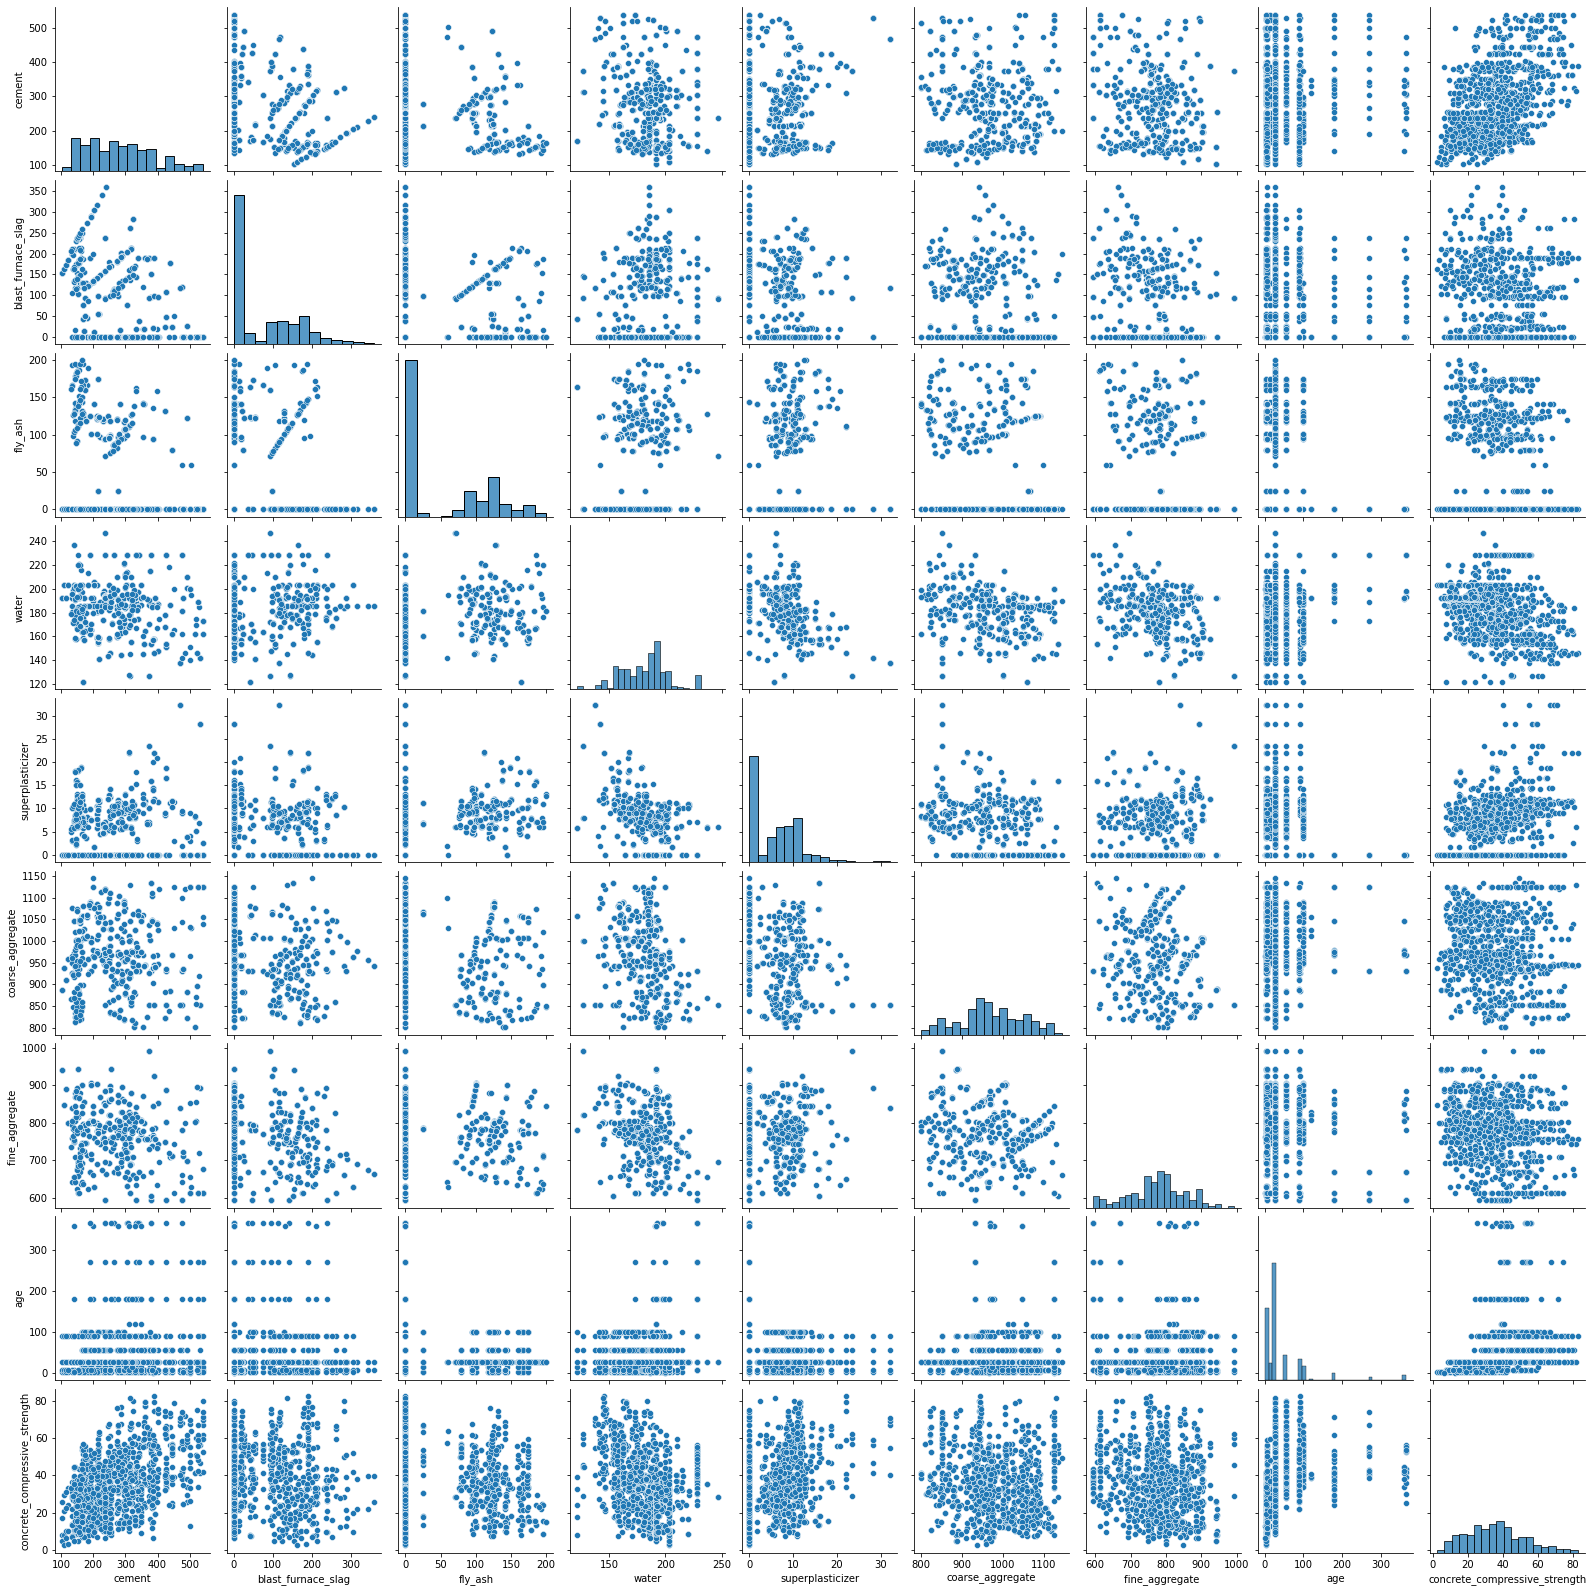

In [6]:
sns.pairplot(df)

<AxesSubplot:>

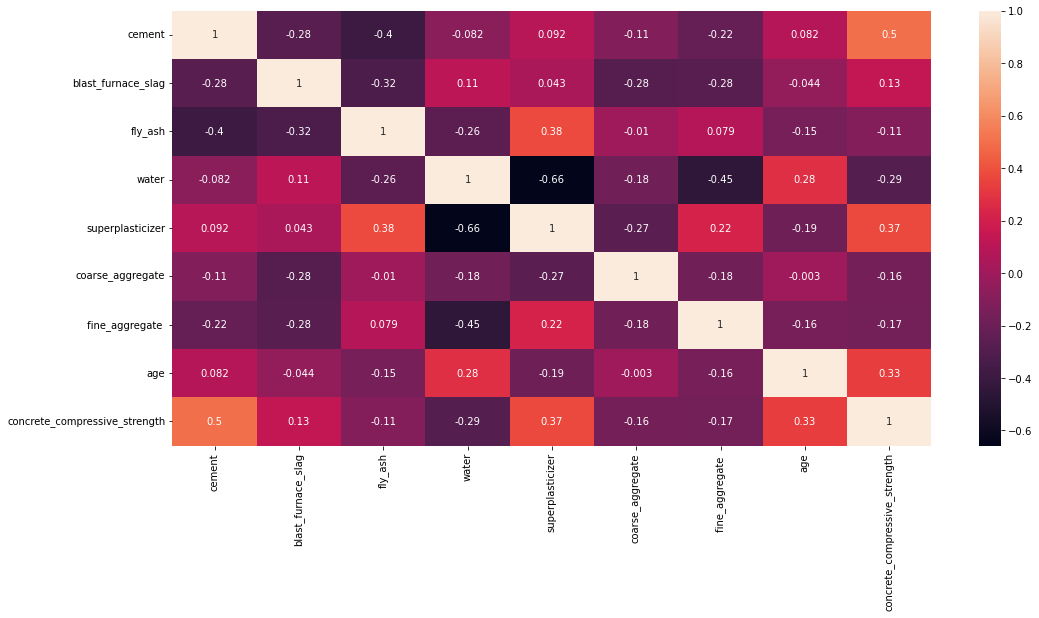

In [7]:
plt.figure(figsize=[17,8])
sns.heatmap(df.corr(),annot=True)

In [8]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [9]:
# independent variables
x = df.drop(['concrete_compressive_strength'],axis=1)
# dependent variables
y = df['concrete_compressive_strength']

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=42)

In [11]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
adb.fit(x,y)
adb.score(x,y)

0.8202664519074813

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor()
gbr.fit(x,y)
gbr.score(x,y)

0.9444877212288236

In [13]:
import xgboost as xgb
xgb=xgb.XGBRegressor()
xgb.fit(x,y)
xgb.score(x,y)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


: 

: 

In [ ]:
from catboost import CatBoostRegressor
cat=CatBoostRegressor(loss_function='RMSE')
cat.fit(x,y,eval_set=(x,y),plot=True)
cat.score(x,y)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.051158
0:	learn: 16.1894445	test: 16.1894445	best: 16.1894445 (0)	total: 50.3ms	remaining: 50.3s
1:	learn: 15.6643214	test: 15.6643214	best: 15.6643214 (1)	total: 52.7ms	remaining: 26.3s
2:	learn: 15.2510119	test: 15.2510119	best: 15.2510119 (2)	total: 55.5ms	remaining: 18.4s
3:	learn: 14.7800902	test: 14.7800902	best: 14.7800902 (3)	total: 63.9ms	remaining: 15.9s
4:	learn: 14.3572596	test: 14.3572596	best: 14.3572596 (4)	total: 73.3ms	remaining: 14.6s
5:	learn: 13.9412755	test: 13.9412755	best: 13.9412755 (5)	total: 96.8ms	remaining: 16s
6:	learn: 13.5283193	test: 13.5283193	best: 13.5283193 (6)	total: 102ms	remaining: 14.5s
7:	learn: 13.1552619	test: 13.1552619	best: 13.1552619 (7)	total: 108ms	remaining: 13.4s
8:	learn: 12.7929828	test: 12.7929828	best: 12.7929828 (8)	total: 118ms	remaining: 13s
9:	learn: 12.4378739	test: 12.4378739	best: 12.4378739 (9)	total: 131ms	remaining: 13s
10:	learn: 12.0959768	test: 12.0959768	best: 12.0959768 (10)	total: 136ms	remain

0.9891641876411362

: 

: 

In [ ]:
import pickle

: 

: 

In [ ]:
pickle.dump(cat,open("cat.pkl","wb"))

: 

: 

In [ ]:
model = pickle.load(open("cat.pkl","rb"))

: 

: 

In [ ]:
print(model.predict([8,3,4,5,6,7,1,2]))

22.405578624172037


: 

: 